In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

In [2]:
data= pd.read_csv("C:\\Users\\Ravi Nadageri\\Documents\\00001 Analysis\\tiktok.csv")

In [3]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,MR LOL GAMER,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,23.8.4,2022-04-05 23:18:30,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,Dino Kljako,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Too many people on it where it's ...,5,0,NaN,2022-04-05 23:18:21,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,Olivia Harding,https://play-lh.googleusercontent.com/a/AATXAJ...,Not bad,5,0,23.9.5,2022-04-05 23:17:34,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,Keli We,https://play-lh.googleusercontent.com/a-/AOh14...,It is good,2,0,22.2.5,2022-04-05 23:17:04,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,Mavis Kotoka,https://play-lh.googleusercontent.com/a/AATXAJ...,Very interesting app,5,0,22.1.5,2022-04-05 23:17:04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
307052,gp:AOqpTOEX2qzcEhnamYxu8Jrnu4Ia0UtuHkajx6I1Y_j...,Nze Alpeace,https://play-lh.googleusercontent.com/a/AATXAJ...,"Best app ever let's do it ,very awesome let ev...",5,0,22.6.5,2022-01-17 10:44:38,NaN,NaN
307053,gp:AOqpTOHnBTSFCqxFYSsNrg4vztYn-Z0Gg3aCIGLliRK...,Shalina Sayed,https://play-lh.googleusercontent.com/a/AATXAJ...,I LOVE TIKTOK,5,0,22.8.4,2022-01-17 10:44:31,NaN,NaN
307054,gp:AOqpTOEuzjdo0NhbqpSBB18hhKP8X6FNPDOWVsan_TA...,ntokozo zondi,https://play-lh.googleusercontent.com/a/AATXAJ...,The videos are amazing...such an amazing app,5,0,22.8.4,2022-01-17 10:43:06,NaN,NaN
307055,gp:AOqpTOFoaOhvxddyVQPQJHpv9f4kgn2u2kkniAWQTRM...,Asika Emeka,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice app,5,0,NaN,2022-01-17 10:42:27,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307057 entries, 0 to 307056
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              307057 non-null  object
 1   userName              307057 non-null  object
 2   userImage             307057 non-null  object
 3   content               307053 non-null  object
 4   score                 307057 non-null  int64 
 5   thumbsUpCount         307057 non-null  int64 
 6   reviewCreatedVersion  217841 non-null  object
 7   at                    307057 non-null  object
 8   replyContent          119 non-null     object
 9   repliedAt             119 non-null     object
dtypes: int64(2), object(8)
memory usage: 23.4+ MB


In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to C:\Users\Ravi
[nltk_data]     Nadageri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                               Good      5
1  Awesome app! Too many people on it where it's ...      5
2                                            Not bad      5
3                                         It is good      2
4                               Very interesting app      5


In [9]:
print(data.isnull().sum())

content    4
score      0
dtype: int64


In [10]:
data = data.dropna()

In [11]:
print(data.isnull().sum())

content    0
score      0
dtype: int64


In [12]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)
#Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [13]:
#Now let’s have a look at the percentages of ratings given to TikTok on the Google Play store:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

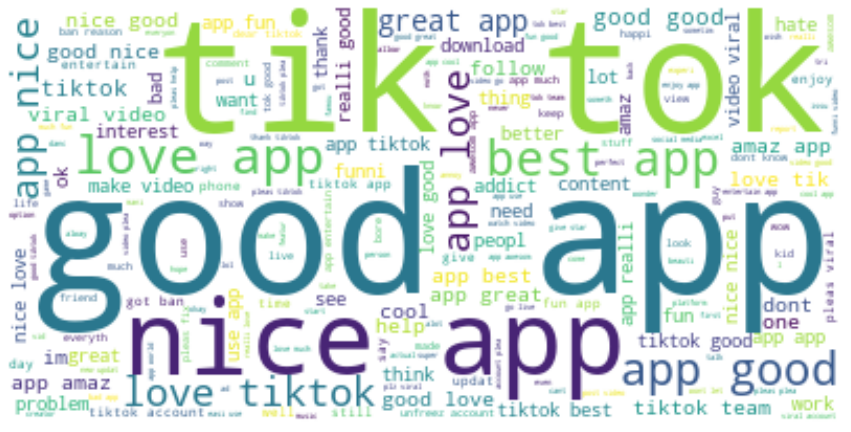

In [14]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Ravi
[nltk_data]     Nadageri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               good     1.000       0.0   
1  awesom app mani peopl easier fb girl awesom gu...     0.381       0.0   
2                                                bad     0.000       1.0   
3                                               good     1.000       0.0   
4                                       interest app     0.750       0.0   

   Neutral  
0    0.000  
1    0.619  
2    0.000  
3    0.000  
4    0.250  


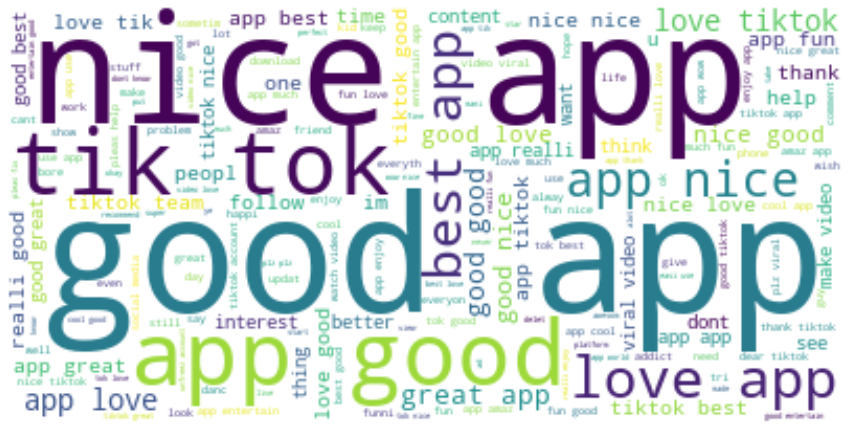

In [16]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

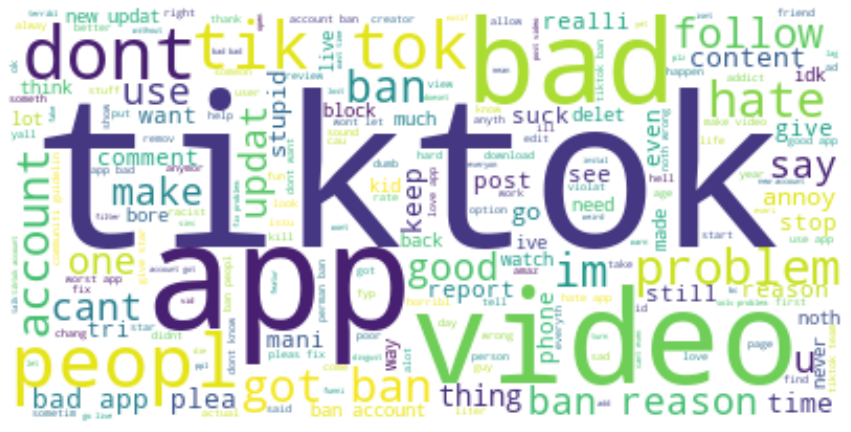

In [17]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()